In [2]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create the Inspector and connect to the Engine
inspector = inspect(engine)

In [11]:
# List the names of tables in the database
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Use Engine Execute to select and display the first 5 rows from the table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# Reflect Database into ORM
Station = Base.classes.station
Measurement = Base.classes.measurement

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Pull what the last date entry is in the table
last_entry = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_entry)

('2017-08-23',)


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 years ago from last entry
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(prev_year)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).order_by(Measurement.date).all()

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
precipitation_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [19]:
# Sort the dataframe by date
precipitation_df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<IPython.core.display.Javascript object>


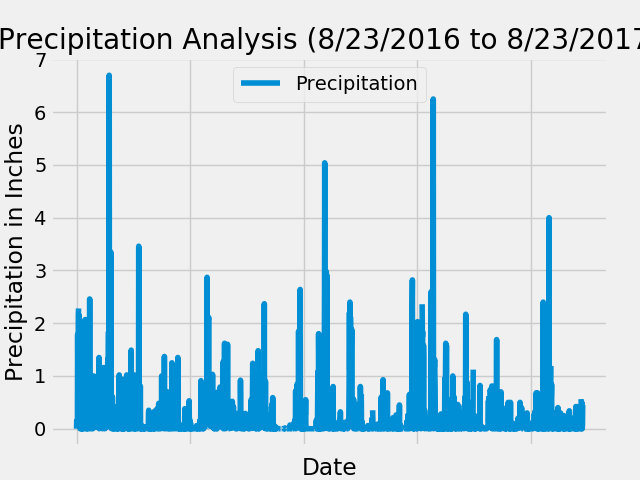

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
precipitation_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation Analysis (8/23/2016 to 8/23/2017)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()

In [58]:
# Use Pandas to calculate the sumamry statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# How many stations are available in this dataset?
Num_Stations = session.query(Measurement).group_by(Measurement.station).count()
print(Num_Stations)

9


In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

In [52]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.max(Measurement.station, Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
#         session.query(func.max(Table.column)))

[('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC00519281'),
 ('USC0051

In [81]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max = session.query(Measurement.station, func.max(Temperature)).\
    filter(Measurement.station == 'USC00519281').all()

NameError: name 'Temperature' is not defined

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

In [33]:
temps_df = pd.DataFrame(temps, columns=['Station', 'Temperature'])
temps_df.head()

,Station,Temperature
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


<IPython.core.display.Javascript object>


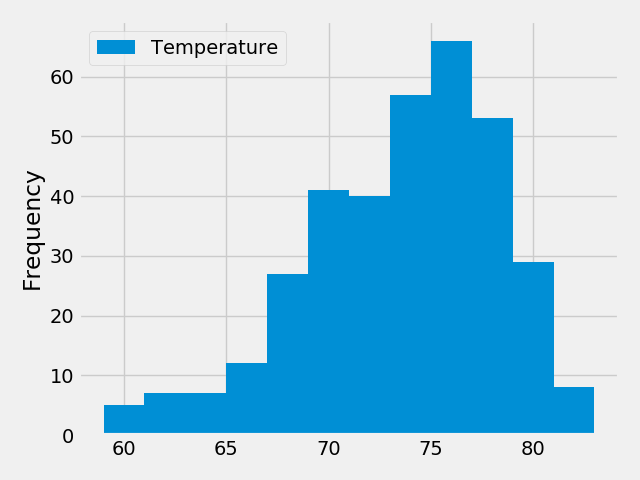

In [34]:
# Plot the results as a histogram with `bins=12`.
temps_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [54]:
# Temperature AnalysisTemperature Analysis

In [68]:
date = dt.datetime(2018, 2, 28)

In [79]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    Tmin = session.query(func.min(Measurement.tobs)).filter(Measurement.date > start_date)\
                             .filter(Measurement.date < end_date).all()
    Tmax = session.query(func.max(Measurement.tobs)).filter(Measurement.date > start_date)\
                             .filter(Measurement.date < end_date).all()
    Tavg = session.query(func.avg(Measurement.tobs)).filter(Measurement.date > start_date)\
                             .filter(Measurement.date < end_date).all()
    return Tmin, Tmax, Tavg
print(calc_temps('2012-02-28', '2012-03-05'))

([(65.0,)], [(74.0,)], [(70.325,)])


In [72]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps("2016-07-12","2016-07-24")

In [73]:
trip

([(71.0)], [(82.0)], [(77.34848484848484)])

In [74]:
trip_df = pd.DataFrame({'Tmin': trip[0][0], 'Tmax': trip[1][0], 'Tavg': trip[2][0]}, columns=['Tmin','Tmax','Tavg'])
trip_df

,Tmin,Tmax,Tavg
0,71.0,82.0,77.348485


<IPython.core.display.Javascript object>


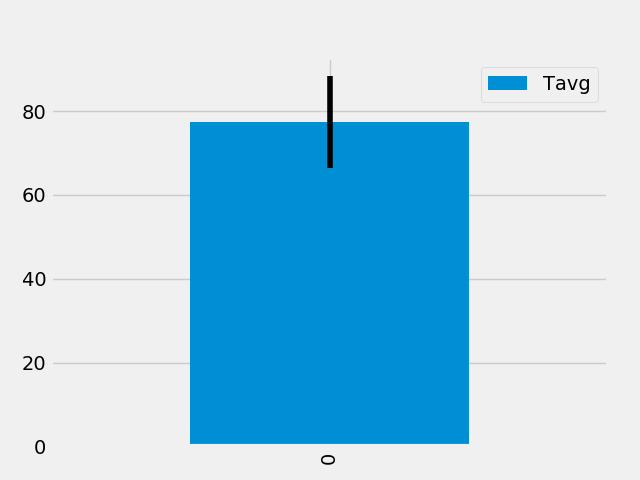

In [76]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = trip_df['Tmax'].sub(trip_df['Tmin'])
trip_df.plot.bar(y='Tavg',yerr=error)

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


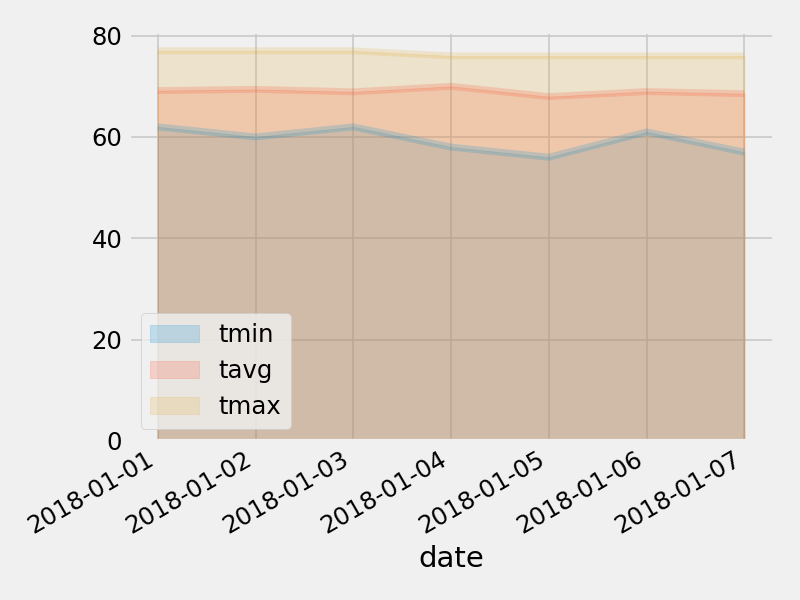

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


In [90]:
# # Step 2 - Climate App
#Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
# Use FLASK to create your routes.
from flask import Flask, jsonify

app = Flask(__name__)

In [91]:

@app.route("/")
def routes():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/stations</br>"
        f"/api/v1.0/<start></br>"
        f"/api/v1.0/<start>/<end>"
    )

In [94]:
#* `/api/v1.0/precipitation`
#* Query for the dates and temperature observations from the last year.
#* Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.
#* Return the JSON representation of your dictionary.
@app.route("/api/v1.0/precipitation")
def precipitations():
    dict = {}
    data = precipitation_df[(precipitation_df.date >= str(prev_year)) & (precipitation_df.date <= str(today))].groupby(['date']).sum()
    for index, row in precipitation_df.iterrows():
        dict[row.date] = row.prcp
    return jsonify(dict)

In [95]:
#* `/api/v1.0/stations`
#* Return a JSON list of stations from the dataset.
@app.route("/api/v1.0/stations")
def stations():
    stations = list(df.measurement.unique())
    return jsonify(stations)

In [96]:
#* `/api/v1.0/tobs`
#* Return a JSON list of Temperature Observations (tobs) for the previous year.
@app.route("/api/v1.0/tobs")
def tobs():
    temps = session.query(measurement.date, measurement.tobs).filter(measurement.date >= prev_year).all()
    temp_results = list(np.ravel(temps))
    return jsonify(temp_results)

In [ ]:
#* `/api/v1.0/<start>` and `/api/v1.0/* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`
#* Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
#* When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
#* When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.
